# Analise das Repostas



In [1]:
import json
import matplotlib
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns

from functools import reduce

sns.set()
QUESTION_URL = "https://raw.githubusercontent.com/getdumont/dumont/master/specialist-api/questions.json"

data = []
all_questions_id = [x for x in range(0, 21)]
questions_json = json.loads(urllib.request.urlopen(QUESTION_URL).read())

with open('/albert/data/answered-sample-2018-11-11-00-58.json') as f:
    data = json.load(f)

pdata = [[], *data]
data_all_questions = reduce((lambda current, atweet: [*current, *atweet['questions']]), pdata)
print('Total de Tweets com Perguntas Atreladas {}'.format(len(data_all_questions)))

data_all_questions = reduce((lambda current, questions: [*current, *questions]), data_all_questions)

print('Total de Perguntas {}'.format(len(data_all_questions)))

Total de Tweets com Perguntas Atreladas 312
Total de Perguntas 688


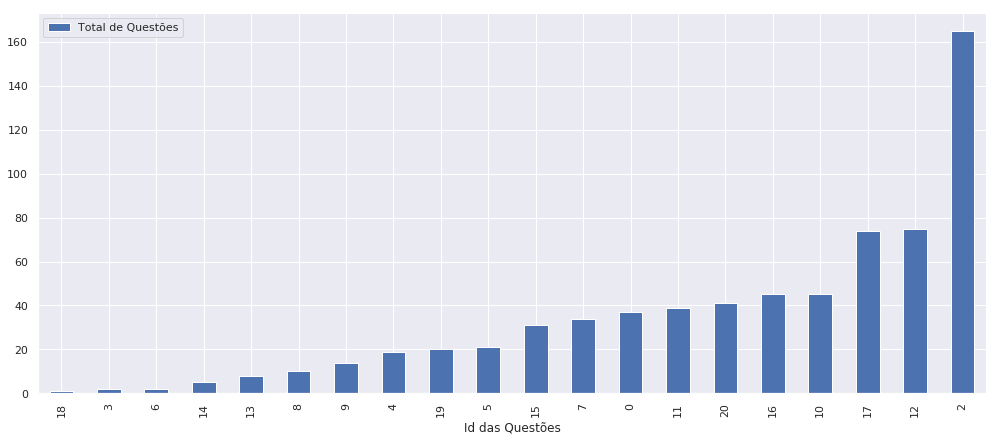

In [6]:
data_df = pd.DataFrame(data_all_questions)

frame_columns = {"question_index":"Id das Questões", "impact": "Total de Questões"}
df_final = data_df.rename(
    index=str, columns=frame_columns
).groupby(
    by=frame_columns['question_index']
).count().sort_values([frame_columns['impact']]).plot(kind='bar', figsize=(17,7))

In [3]:
idx = 0

for q in questions_json['questions']:
    print('{0} & {1} & {2} \\\\'.format(idx, q['value'], questions_json['constructos'][q['contructo']]))
    idx += 1
          


0 & Tive dificuldade de me acalmar & Estresse \\
1 & Minha boca ficou seca & Ansiedade \\
2 & Não tive nenhum sentimento positivo & Depressão \\
3 & Em alguns momentos tive dificuldade de respirar (chiado e falta de ar sem esforço físico) & Ansiedade \\
4 & Não consegui ter iniciativa para fazer as coisas & Depressão \\
5 & Exagerei intencionalmente ao reagir a situações & Estresse \\
6 & Tive tremedeira (por exemplo, nas mãos) & Ansiedade \\
7 & Senti que estava sempre nervoso(a) & Estresse \\
8 & Me preocupei com situações em que poderia entrar em pânico e parecer ridículo(a) & Ansiedade \\
9 & Senti que não tinha vontade de nada & Depressão \\
10 & Me senti inquieto(a) & Estresse \\
11 & Tive dificuldade de relaxar & Estresse \\
12 & Me senti deprimido e sem motivação & Depressão \\
13 & Eu não conseguia tolerar as coisas que me impediam de continuar a fazer o que estava realizando & Estresse \\
14 & Eu senti que ia entrar em pânico & Ansiedade \\
15 & Nada me deixou entusiasmado & 

In [4]:
answered_ids = data_df.groupby(by='question_index').count().index.values.tolist()
tb_missing = []

for item in [item for item in all_questions_id if item not in answered_ids]:
    q = questions_json['questions'][item]
    tb_missing.append({'Questão': q["value"], 'Construto': questions_json["constructos"][q["contructo"]]})

pd.DataFrame(tb_missing)

,Construto,Questão
0,Ansiedade,Minha boca ficou seca
